In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
master_df = pd.read_csv('data/telecom_churn_data.csv')
master_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
master_df.shape

(99999, 226)

In [4]:
master_df['mobile_number'].nunique()

99999


The data set has 99999 rows and the number of unique mobile number is too 99999 hence each row corresponds to a unique mobile number

#### Filter High Value customers

Identify high value customers - good and action phase - good phase is month 6 and 7.
The columns of interest are recharge amounts.

In [11]:
rec_cols = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_num_6', 'total_rech_num_7']

In [12]:
for c in rec_cols:
    print(f'Null values for column "{c}": {sum(master_df[c].isna())}')

Null values for column "total_rech_amt_6": 0
Null values for column "total_rech_amt_7": 0
Null values for column "total_rech_num_6": 0
Null values for column "total_rech_num_7": 0


In [13]:
for c in rec_cols:
    print(f'Number of rows of "{c}" not int : {sum(master_df[c].map(type) != int)}')

Number of rows of "total_rech_amt_6" not int : 0
Number of rows of "total_rech_amt_7" not int : 0
Number of rows of "total_rech_num_6" not int : 0
Number of rows of "total_rech_num_7" not int : 0


None of the columns pertaining to recharge amounts of first 2 months and the number of times recharged - have values other than int and all of them have 99999 values in total with no nan values. Hence data quality is verified.

In [24]:
master_df[(master_df['total_rech_num_6'] == 0) & (master_df['total_rech_amt_6'] > 0)].shape[0]

(0, 226)

In [25]:
master_df[(master_df['total_rech_num_7'] == 0) & (master_df['total_rech_amt_7'] > 0)].shape[0]

0

The above code was to check that if the total recharge done is zero for months 6 and 7 then the number of times recharge done should too be zero. Its perfect that way.

In [49]:
def handle_data_cols_na(data_rec_cols):
    for c in data_rec_cols:
        print(f'na rows for "{c}" {sum(master_df[c].isna())}')

    # if count of recharge is 0 or na and 
    #    date of last recharge is na and
    #    average rech amount is 0 or na,
    # then fill the na values is those rows to 0
    rows_where_count_amount_zero = master_df[(((master_df[data_rec_cols[1]]==0)|
                                              (master_df[data_rec_cols[1]].isna()))&
                                             (master_df[data_rec_cols[3]].isna())&
                                             ((master_df[data_rec_cols[2]]==0)|
                                              (master_df[data_rec_cols[2]].isna()))&
                                             ((master_df[data_rec_cols[0]]==0)|
                                              (master_df[data_rec_cols[0]].isna())))].index

    print(f'Len of filtered rows {len(rows_where_count_amount_zero)}')

    for c in data_rec_cols:
        master_df.at[rows_where_count_amount_zero, c] = 0

    for c in data_rec_cols:
        print(f'na rows for "{c}" {sum(master_df[c].isna())}')

In [50]:
handle_data_cols_na(['av_rech_amt_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'date_of_last_rech_data_6'])

na rows for "av_rech_amt_data_6" 0
na rows for "count_rech_2g_6" 0
na rows for "count_rech_3g_6" 0
na rows for "date_of_last_rech_data_6" 74846
Len of filtered rows 74846
na rows for "av_rech_amt_data_6" 0
na rows for "count_rech_2g_6" 0
na rows for "count_rech_3g_6" 0
na rows for "date_of_last_rech_data_6" 0


In [51]:
handle_data_cols_na(['av_rech_amt_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'date_of_last_rech_data_7'])

na rows for "av_rech_amt_data_7" 74428
na rows for "count_rech_2g_7" 74428
na rows for "count_rech_3g_7" 74428
na rows for "date_of_last_rech_data_7" 74428
Len of filtered rows 74428
na rows for "av_rech_amt_data_7" 0
na rows for "count_rech_2g_7" 0
na rows for "count_rech_3g_7" 0
na rows for "date_of_last_rech_data_7" 0


In [52]:
handle_data_cols_na(['av_rech_amt_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'date_of_last_rech_data_8'])

na rows for "av_rech_amt_data_8" 73660
na rows for "count_rech_2g_8" 73660
na rows for "count_rech_3g_8" 73660
na rows for "date_of_last_rech_data_8" 73660
Len of filtered rows 73660
na rows for "av_rech_amt_data_8" 0
na rows for "count_rech_2g_8" 0
na rows for "count_rech_3g_8" 0
na rows for "date_of_last_rech_data_8" 0


In [55]:
# get the total recharge by adding up the total recharges of talktime and data for months 6, 7 and 8.
for m in ['6', '7', '8']:
    master_df['total_data_rech_month_'+m] = (master_df['count_rech_2g_'+m] + master_df['count_rech_3g_'+m]) \
                                                                        * master_df['av_rech_amt_data_'+m]

In [56]:
print(sum(master_df['total_data_rech_month_6'].isna()))
print(sum(master_df['total_data_rech_month_7'].isna()))

0
0


In [71]:
cols_for_avg_recharge_amnt = ['total_rech_amt_6', 'total_rech_amt_7',
                              'total_data_rech_month_6', 'total_data_rech_month_7']

master_df['avg_recharge_amt'] = master_df[cols_for_avg_recharge_amnt].sum(axis='columns') / 4

In [73]:
sum(master_df['avg_recharge_amt'].isna())

0

In [75]:
cut_off = master_df['avg_recharge_amt'].quantile(0.7)
cut_off

239.0

In [76]:
high_value_customers = master_df[master_df['avg_recharge_amt'] > cut_off]
high_value_customers.shape

(29953, 230)

#### Tag churners¶


In [77]:
tag_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
high_value_customers[tag_cols].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,29953.000000,29953.000000,29953.000000,29953.000000
mean,265.079232,501.141639,91.405987,349.915812
std,358.502996,667.138160,282.104414,947.700826
min,0.000000,0.000000,0.000000,0.000000
25%,50.490000,47.730000,0.000000,0.000000
50%,158.030000,285.130000,0.000000,0.000000
75%,343.960000,698.790000,38.020000,321.570000
max,7785.730000,11517.730000,8993.950000,39221.270000


In [78]:
high_value_customers['churn'] = high_value_customers[tag_cols].sum(axis='columns') == 0

high_value_customers['churn'].map({True: 1, False: 0})

high_value_customers['churn'].sum()

/home/shakeeb/anaconda3/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2433

In [79]:
def pretty_print_cols_list(cols):
    rows = len(cols)//5
    if len(cols) % 5:
        rows += 1
    for i in range(rows):
        start_index = i*5
        print(cols[start_index:start_index+5])    

In [80]:
drop_month_9_cols = [c for c in high_value_customers.columns if '_9' in c]
pretty_print_cols_list(drop_month_9_cols)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9']
['roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9']
['loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9']
['std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9']
['loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9']
['std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9']
['spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9']
['max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9']
['max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9']
['vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9']
['sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [81]:
high_value_customers = high_value_customers.drop(columns=drop_month_9_cols)
high_value_customers.shape

(29953, 177)

### Data Understanding and Cleanup

In [83]:
high_value_customers['circle_id'].nunique()

1

All customers belong to same circle - not useful.

In [84]:
high_value_customers = high_value_customers.drop(columns=['circle_id'])

In [88]:
date_cols = [c for c in high_value_customers.columns if 'date' in c]
pretty_print_cols_list(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7']
['date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


We can eliminate certain columns like date of last recharge,last recharge of data ,last date ,mobile number.As they are of no business value, afterall the amount of recharge matters.

In [89]:
high_value_customers = high_value_customers.drop(columns=date_cols)
high_value_customers = high_value_customers.drop(columns='mobile_number')
high_value_customers.shape

(29953, 166)

In [90]:
# get all cols where min and max are same
same_val_cols = []
for c in high_value_customers.columns:
    try:
        if high_value_customers[c].min() == high_value_customers[c].max():
            same_val_cols.append(c)
    except:
        pass
pretty_print_cols_list(same_val_cols)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7']
['std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


Drop all same valued columns as they dont offer any info.

In [91]:
high_value_customers = high_value_customers.drop(columns=same_val_cols)
high_value_customers.shape

(29953, 157)

Arpu is not useful attribute as the the tax of paid by the mobile operators.

In [93]:
arpu_cols = [c for c in high_value_customers.columns if 'arpu' in c]
pretty_print_cols_list(arpu_cols)

['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7']
['arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']


In [94]:
high_value_customers = high_value_customers.drop(columns=arpu_cols)
high_value_customers.shape

(29953, 148)

#### Handle missing values

In [96]:
# look at columns where percentage of missing values is greater than 30%
def percentage(x):
    return round(x * 100, 2)

def get_missing_value_df(df):
    missing_values = pd.DataFrame()
    missing_cols = []
    missing_pers = []
    for c in df.columns:
        missing_percentage = percentage(df[c].isnull().sum() / df.shape[0])
        if missing_percentage > 0:
            missing_cols.append(c)
            missing_pers.append(missing_percentage)
    missing_values['col'] = missing_cols
    missing_values['per'] = missing_pers
    missing_values.columns=missing_values.columns.str.strip()
    missing_values.sort_values('per', ascending=False, inplace=True)
    return missing_values

In [97]:
missing_values = get_missing_value_df(high_value_customers)
print(missing_values[missing_values['per'] >= 30])

                  col    per
92          fb_user_8  46.80
83  total_rech_data_8  46.80
89   night_pck_user_8  46.80
86    max_rech_data_8  46.80
87   night_pck_user_6  44.11
81  total_rech_data_6  44.11
90          fb_user_6  44.11
84    max_rech_data_6  44.11
82  total_rech_data_7  43.12
85    max_rech_data_7  43.12
88   night_pck_user_7  43.12
91          fb_user_7  43.12


We can drop all the variables like total_rech_data_6,7,8 as we have new columns for it.We imputed right in the beginning for average recharge which determines it.Also max_rech_data 6,7,8 serves no purpose as total recharge is much more significant.

In [98]:
drop_cols = ['total_rech_data_8', 'max_rech_data_8',
             'total_rech_data_6', 'max_rech_data_6',
             'total_rech_data_7', 'max_rech_data_7']
high_value_customers = high_value_customers.drop(drop_cols, axis='columns')

In [99]:
missing_values = get_missing_value_df(high_value_customers)
print(missing_values[missing_values['per'] >= 30])

                 col    per
86         fb_user_8  46.80
83  night_pck_user_8  46.80
84         fb_user_6  44.11
81  night_pck_user_6  44.11
85         fb_user_7  43.12
82  night_pck_user_7  43.12


In [118]:
def mean_of_classes(df, col):
    print(f'Churn=1: mean:{col} = {df[df["churn"] == 1][col].mean()}')
    print(f'Churn=0: mean:{col} = {df[df["churn"] == 0][col].mean()}')    

In [108]:
high_value_customers['fb_user_8'].value_counts()

1.0    14297
0.0     1638
Name: fb_user_8, dtype: int64

In [119]:
mean_of_classes(high_value_customers, 'fb_user_8')

Churn=1: mean:fb_user_8 = 0.7581699346405228
Churn=0: mean:fb_user_8 = 0.9013310933057638


Since the fb_user column is a flag and that there is a difference between churned and non churned customers of its usage, we will consider na values to be 0.

In [120]:
cols = ['fb_user_6', 'fb_user_7', 'fb_user_8']
high_value_customers[cols] = high_value_customers[cols].fillna(0)

In [121]:
high_value_customers['night_pck_user_8'].value_counts()

0.0    15594
1.0      341
Name: night_pck_user_8, dtype: int64

In [122]:
mean_of_classes(high_value_customers, 'night_pck_user_8')

Churn=1: mean:night_pck_user_8 = 0.0196078431372549
Churn=0: mean:night_pck_user_8 = 0.02145257172395968


since the difference between classes is insignificant, we can drop night pck cols

In [126]:
cols = ['night_pck_user_'+str(m) for m in [6, 7, 8]]
high_value_customers = high_value_customers.drop(cols, axis='columns')

In [127]:
missing_values = get_missing_value_df(high_value_customers)
missing_values.head()

,col,per
80,ic_others_8,3.91
17,loc_og_t2m_mou_8,3.91
38,std_og_mou_8,3.91
44,spl_og_mou_8,3.91
35,std_og_t2f_mou_8,3.91


In [147]:
def BoxPlot(df, attributes, figsize=None):
    if not figsize:
        figsize = (18, 12)
    num_rows = len(attributes)
    i = 1
    for attribute in attributes:
        mean_of_classes(df, attribute)
        
        df = df[~df[attribute].isna()]
        churned_df = df[df['churn'] ==1]
        nonchurned_df = df[df['churn'] ==0]
        
        plt.figure(figsize=figsize)
        
        plt.subplot(num_rows, 2, i)
        plt.boxplot(churned_df[attribute])
        plt.title(f"Churn=1 {attribute}")
        
        plt.subplot(num_rows, 2, i+1)
        plt.boxplot(nonchurned_df[attribute])
        plt.title(f"Churn=0 {attribute}")
        plt.show()
        
        i = i + 2

Churn=1: mean:ic_others_6 = 0.9726260412099957
Churn=0: mean:ic_others_6 = 1.1936538886841135


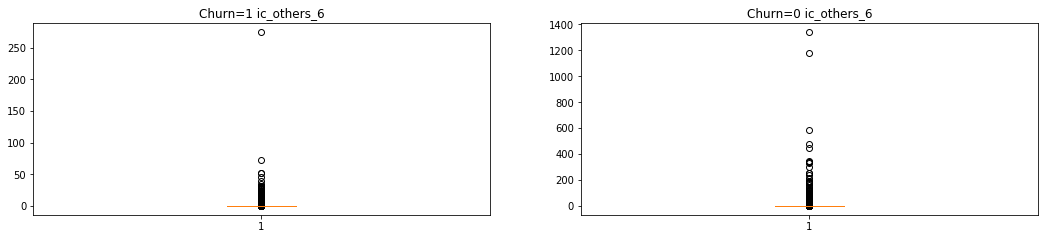

Churn=1: mean:ic_others_7 = 0.9186857936140674
Churn=0: mean:ic_others_7 = 1.5848339688298225


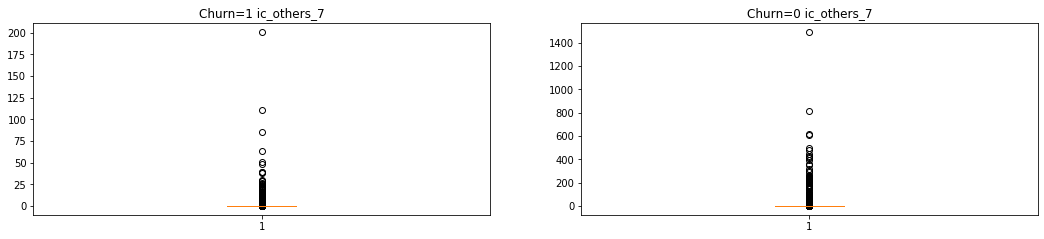

Churn=1: mean:ic_others_8 = 0.6056486146095719
Churn=0: mean:ic_others_8 = 1.3199505061030068


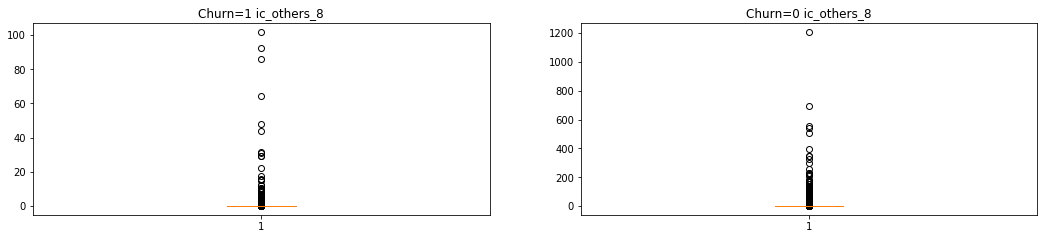

In [139]:
cols = ['ic_others_6','ic_others_7','ic_others_8']
BoxPlot(high_value_customers, cols)

There are some differences in distributions atleast with regard to extreme values.
Its good to retain them , they seem to be highly skewed, so they can be imputed by median.

In [140]:
#This function imputes with the median of respective churn/non churn classes
def ImputeMedian(df, attributes):
    for attribute in attributes:
        cf = df[~df[attribute].isna()]
        notna_notchurn_df = cf[(cf['churn']==0)]
        notna_churn_df = cf[(cf['churn']==1)]
        df.loc[((df['churn'] ==1) &(df[attribute].isna())),[attribute]]=np.median(notna_notchurn_df[attribute])
        df.loc[((df['churn'] ==0 )&(df[attribute].isna())),[attribute]]=np.median(notna_churn_df[attribute])
    return df

In [141]:
high_value_customers = ImputeMedian(high_value_customers, cols)

In [143]:
missing_values = get_missing_value_df(high_value_customers)
missing_values.head(10)

,col,per
77,isd_ic_mou_8,3.91
62,std_ic_t2t_mou_8,3.91
35,std_og_t2f_mou_8,3.91
44,spl_og_mou_8,3.91
32,std_og_t2m_mou_8,3.91
47,og_others_8,3.91
29,std_og_t2t_mou_8,3.91
50,loc_ic_t2t_mou_8,3.91
26,loc_og_mou_8,3.91
53,loc_ic_t2m_mou_8,3.91


Churn=1: mean:loc_og_t2t_mou_6 = 63.81162209557212
Churn=0: mean:loc_og_t2t_mou_6 = 88.00937559896795


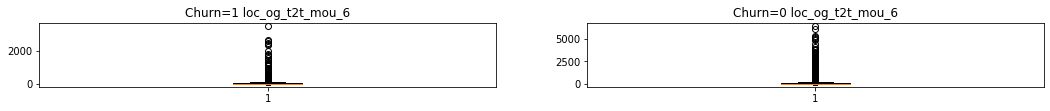

Churn=1: mean:loc_og_t2t_mou_7 = 49.62299861175382
Churn=0: mean:loc_og_t2t_mou_7 = 90.94966090400916


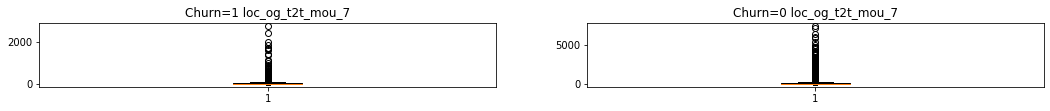

Churn=1: mean:loc_og_t2t_mou_8 = 24.17499370277078
Churn=0: mean:loc_og_t2t_mou_8 = 85.49282822268532


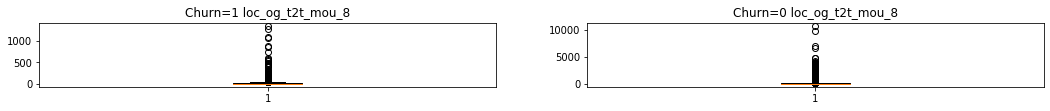

In [150]:
cols = ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8']
BoxPlot(high_value_customers, cols, figsize=(18, 4))

There is considerable skewness in the data between churn/non churn. Impute the values of na's with their respective medians of groups of churned and unchurned.

In [152]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:loc_og_t2m_mou_6 = 120.44119684348969
Churn=0: mean:loc_og_t2m_mou_6 = 170.17635311463326


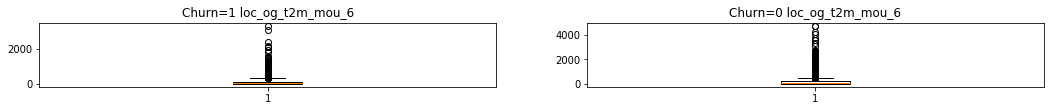

Churn=1: mean:loc_og_t2m_mou_7 = 98.2894585839889
Churn=0: mean:loc_og_t2m_mou_7 = 172.39478436308445


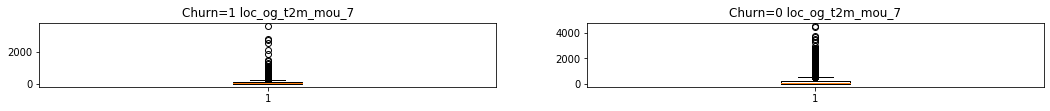

Churn=1: mean:loc_og_t2m_mou_8 = 48.0851952141058
Churn=0: mean:loc_og_t2m_mou_8 = 165.79837451622507


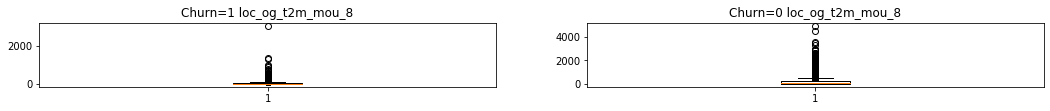

In [153]:
cols = ['loc_og_t2m_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))

By similar logic as loc_og_t2t, we impute all skewed colums with thier respective medians.

In [154]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:loc_og_t2f_mou_6 = 3.8654362121876376
Churn=0: mean:loc_og_t2f_mou_6 = 6.683928123848139


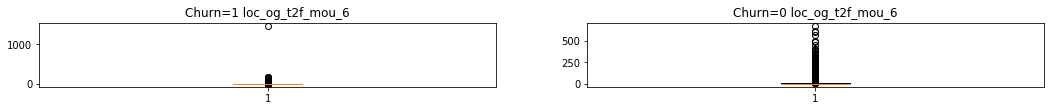

Churn=1: mean:loc_og_t2f_mou_7 = 3.0948634891254048
Churn=0: mean:loc_og_t2f_mou_7 = 6.839853774108763


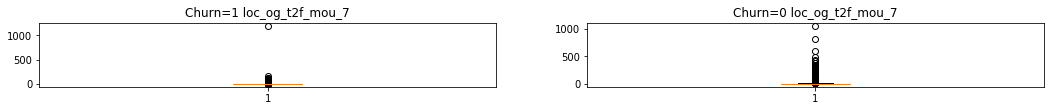

Churn=1: mean:loc_og_t2f_mou_8 = 1.667191435768262
Churn=0: mean:loc_og_t2f_mou_8 = 6.42802470973504


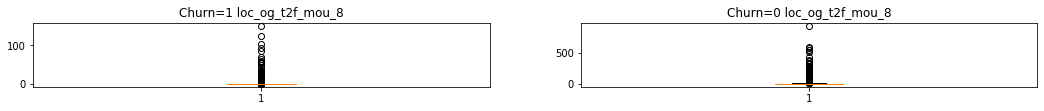

In [155]:
cols = ['loc_og_t2f_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))

In [156]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:loc_og_t2c_mou_6 = 1.6811617711530034
Churn=0: mean:loc_og_t2c_mou_6 = 1.6001666052340584


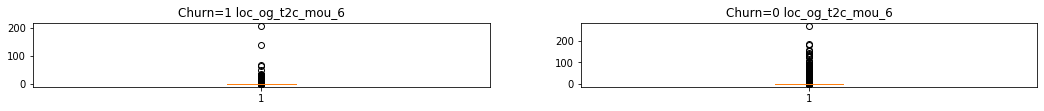

Churn=1: mean:loc_og_t2c_mou_7 = 2.200249884312818
Churn=0: mean:loc_og_t2c_mou_7 = 1.8976018953837042


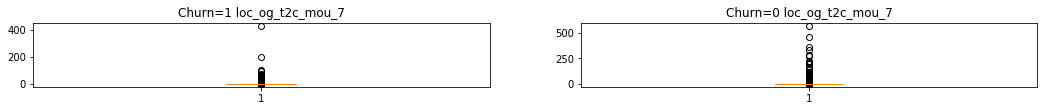

Churn=1: mean:loc_og_t2c_mou_8 = 1.364729219143577
Churn=0: mean:loc_og_t2c_mou_8 = 1.7947075022328076


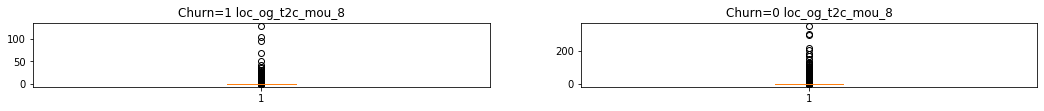

In [157]:
cols = ['loc_og_t2c_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))


As we see both mean and median is more or less similar close to zero and 1 ,this column can be dropped off,however the number of times the person makes calls to call center can be determining factor for churn as if the people are not happy with service they frequently call the call center,we can let the model decide on this.

In [158]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:std_og_t2t_mou_6 = 307.21448925909687
Churn=0: mean:std_og_t2t_mou_6 = 157.33080648728344


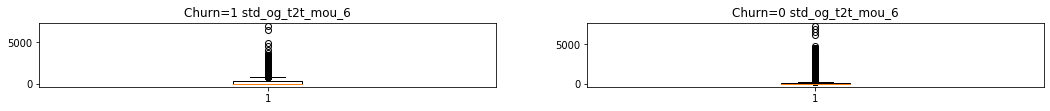

Churn=1: mean:std_og_t2t_mou_7 = 252.08761684405366
Churn=0: mean:std_og_t2t_mou_7 = 171.38172139340315


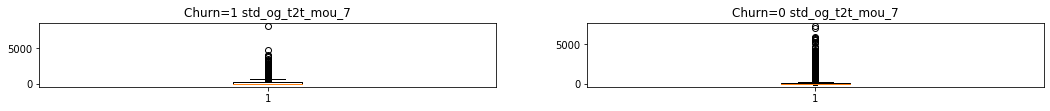

Churn=1: mean:std_og_t2t_mou_8 = 117.77415617128463
Churn=0: mean:std_og_t2t_mou_8 = 157.15077813337302


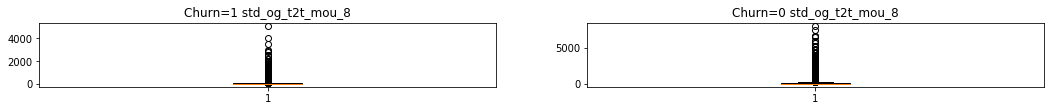

In [159]:
cols = ['std_og_t2t_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))

This is interesting contrary to local calls the churned users have higher std usage for outgoing calls of this category.

In [160]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:std_og_t2m_mou_6 = 334.6640201665936
Churn=0: mean:std_og_t2m_mou_6 = 169.9731942499079


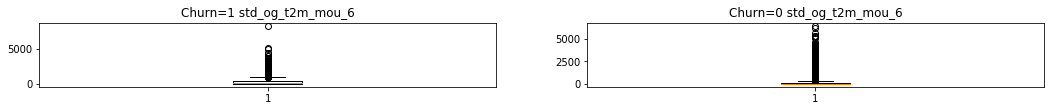

Churn=1: mean:std_og_t2m_mou_7 = 279.3426099028227
Churn=0: mean:std_og_t2m_mou_7 = 184.71798948654353


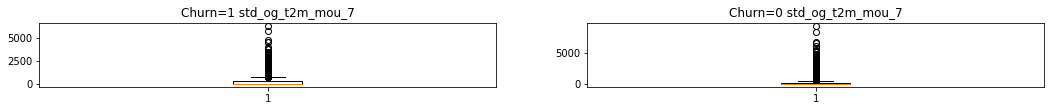

Churn=1: mean:std_og_t2m_mou_8 = 113.95238035264484
Churn=0: mean:std_og_t2m_mou_8 = 167.007351518309


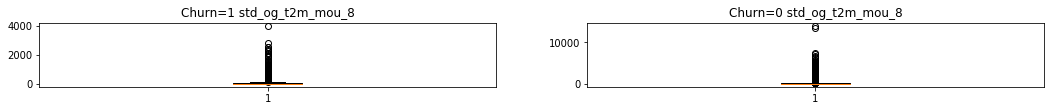

In [161]:
cols = ['std_og_t2m_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))

In [162]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:std_og_t2f_mou_6 = 1.3072336694432267
Churn=0: mean:std_og_t2f_mou_6 = 1.8843365278289717


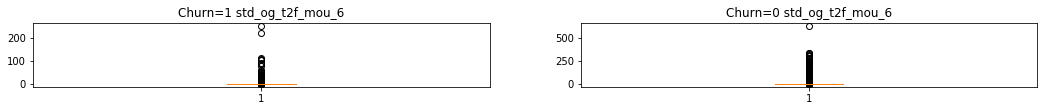

Churn=1: mean:std_og_t2f_mou_7 = 1.185428042572883
Churn=0: mean:std_og_t2f_mou_7 = 1.9242971902417354


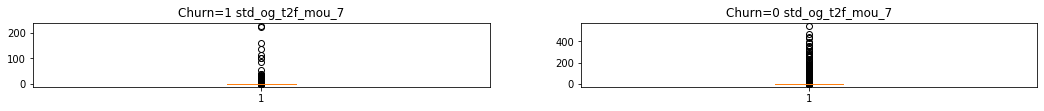

Churn=1: mean:std_og_t2f_mou_8 = 0.49849496221662476
Churn=0: mean:std_og_t2f_mou_8 = 1.7279856356058347


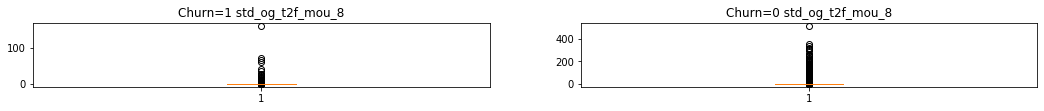

In [163]:
cols = ['std_og_t2f_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))

In [164]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:isd_og_mou_6 = 4.639943007452871
Churn=0: mean:isd_og_mou_6 = 2.011201990416513


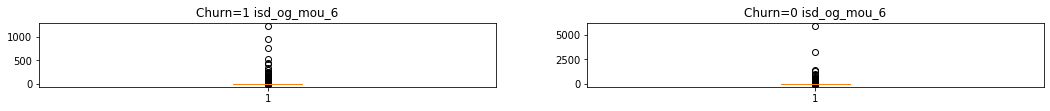

Churn=1: mean:isd_og_mou_7 = 3.2244192503470614
Churn=0: mean:isd_og_mou_7 = 2.0027364602228555


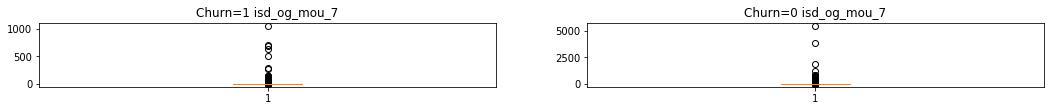

Churn=1: mean:isd_og_mou_8 = 1.6620654911838795
Churn=0: mean:isd_og_mou_8 = 1.9922335516522776


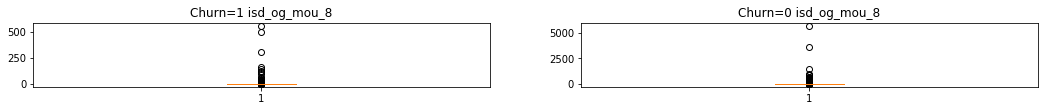

In [170]:
cols = ['isd_og_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))

Although the median is 0 for all 3 months in case isd outgoing calls,however is is some difference in the means. We can impute the data with median as it is quite skewed,isd calls are slightly higher in duration in case of churn

In [171]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:spl_og_mou_6 = 7.674300745287154
Churn=0: mean:spl_og_mou_6 = 5.7859734611131595


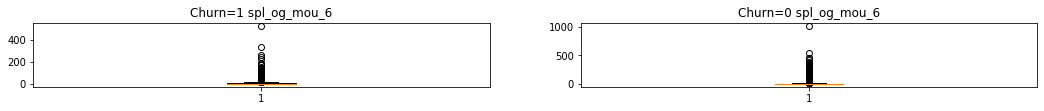

Churn=1: mean:spl_og_mou_7 = 8.114951411383617
Churn=0: mean:spl_og_mou_7 = 7.175978232702773


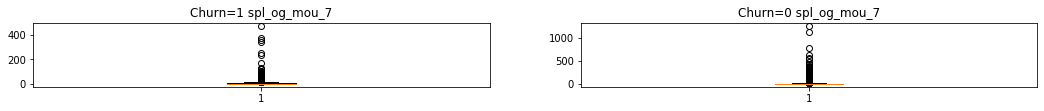

Churn=1: mean:spl_og_mou_8 = 3.927090680100756
Churn=0: mean:spl_og_mou_8 = 6.999780440607323


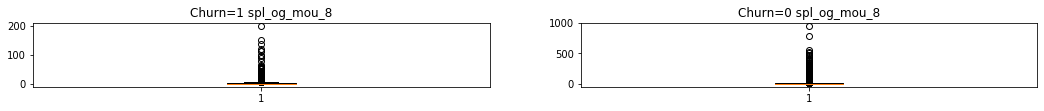

In [172]:
cols = ['spl_og_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))

In [173]:
high_value_customers = ImputeMedian(high_value_customers, cols)

In [174]:
missing_values = get_missing_value_df(high_value_customers)
missing_values.head(10)

,col,per
50,isd_ic_mou_8,3.91
32,loc_ic_mou_8,3.91
35,std_ic_t2t_mou_8,3.91
20,og_others_8,3.91
14,loc_og_mou_8,3.91
38,std_ic_t2m_mou_8,3.91
26,loc_ic_t2m_mou_8,3.91
11,roam_og_mou_8,3.91
41,std_ic_t2f_mou_8,3.91
17,std_og_mou_8,3.91


Churn=1: mean:isd_ic_mou_6 = 12.622170100832967
Churn=0: mean:isd_ic_mou_6 = 10.863662366384078


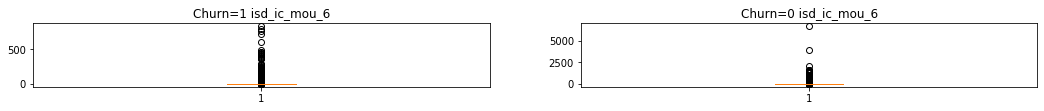

Churn=1: mean:isd_ic_mou_7 = 10.792919944470153
Churn=0: mean:isd_ic_mou_7 = 12.107161366749343


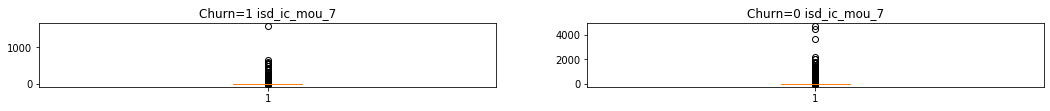

Churn=1: mean:isd_ic_mou_8 = 5.388362720403023
Churn=0: mean:isd_ic_mou_8 = 11.718188076808573


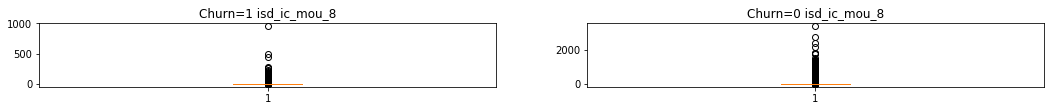

Churn=1: mean:loc_ic_mou_6 = 175.68439719421306
Churn=0: mean:loc_ic_mou_6 = 240.57973387394028


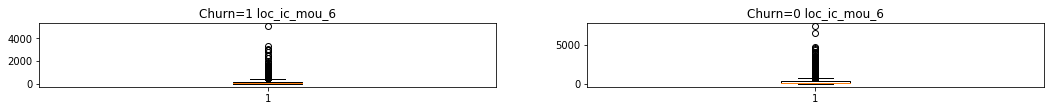

Churn=1: mean:loc_ic_mou_7 = 142.65770476631192
Churn=0: mean:loc_ic_mou_7 = 248.0187731832821


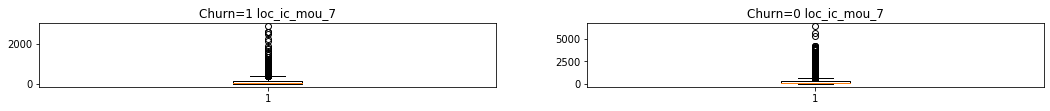

Churn=1: mean:loc_ic_mou_8 = 66.90376574307304
Churn=0: mean:loc_ic_mou_8 = 244.36543465317058


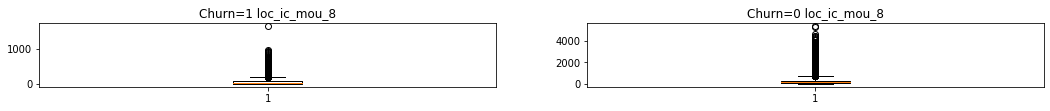

Churn=1: mean:std_ic_t2t_mou_6 = 22.533708899605436
Churn=0: mean:std_ic_t2t_mou_6 = 14.552355694802802


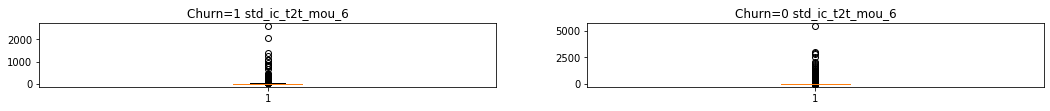

Churn=1: mean:std_ic_t2t_mou_7 = 17.26245256825544
Churn=0: mean:std_ic_t2t_mou_7 = 15.629971495206014


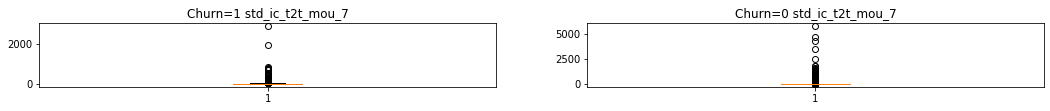

Churn=1: mean:std_ic_t2t_mou_8 = 6.682770780856423
Churn=0: mean:std_ic_t2t_mou_8 = 14.997061997618339


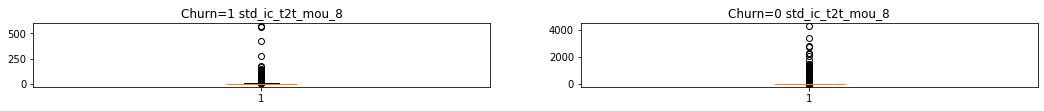

Churn=1: mean:std_ic_t2m_mou_6 = 33.36111793073213
Churn=0: mean:std_ic_t2m_mou_6 = 29.44724474751198


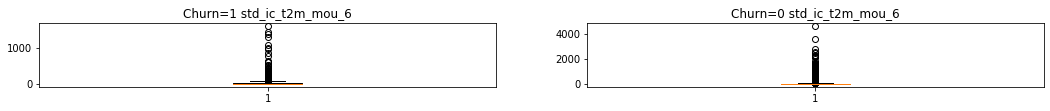

Churn=1: mean:std_ic_t2m_mou_7 = 29.21225358630264
Churn=0: mean:std_ic_t2m_mou_7 = 31.685167882130823


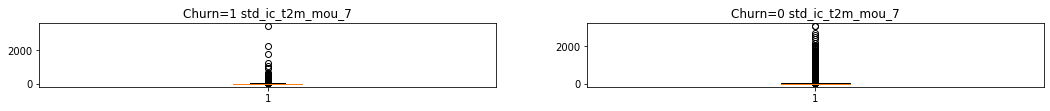

Churn=1: mean:std_ic_t2m_mou_8 = 13.957153652392947
Churn=0: mean:std_ic_t2m_mou_8 = 30.14130061030069


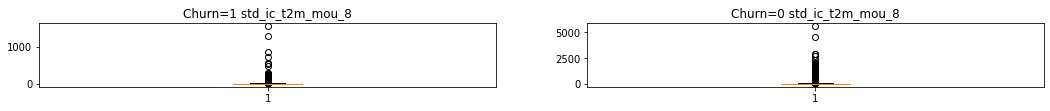

Churn=1: mean:std_ic_t2f_mou_6 = 1.7975098640946952
Churn=0: mean:std_ic_t2f_mou_6 = 2.8285259859933656


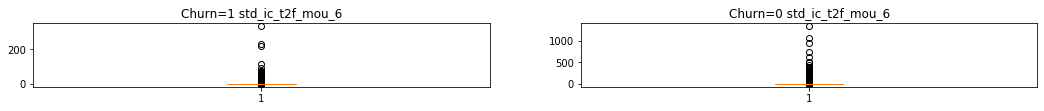

Churn=1: mean:std_ic_t2f_mou_7 = 1.7579176307265156
Churn=0: mean:std_ic_t2f_mou_7 = 2.958776515011291


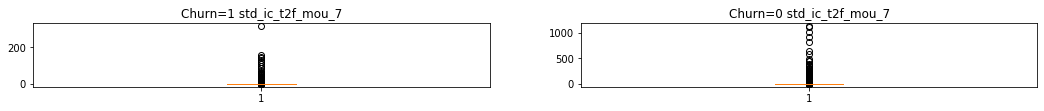

Churn=1: mean:std_ic_t2f_mou_8 = 0.7063664987405541
Churn=0: mean:std_ic_t2f_mou_8 = 2.8045303661804106


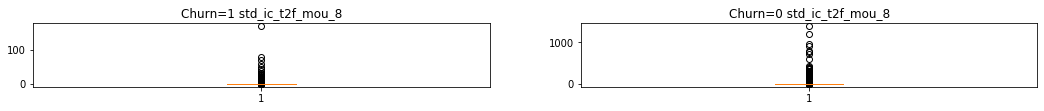

In [175]:
for c in ['isd_ic_mou_', 'loc_ic_mou_', 'std_ic_t2t_mou_', 'std_ic_t2m_mou_', 'std_ic_t2f_mou_']:
    cols = [c+str(m) for m in [6, 7, 8]]
    BoxPlot(high_value_customers, cols, figsize=(18, 4))

In [176]:
for c in ['isd_ic_mou_', 'loc_ic_mou_', 'std_ic_t2t_mou_', 'std_ic_t2m_mou_', 'std_ic_t2f_mou_']:
    cols = [c+str(m) for m in [6, 7, 8]]
    high_value_customers = ImputeMedian(high_value_customers, cols)

In [192]:
missing_values = get_missing_value_df(high_value_customers)
missing_values.head(10)

,col,per
35,spl_ic_mou_8,3.91
29,loc_ic_t2f_mou_8,3.91
14,loc_og_mou_8,3.91
23,loc_ic_t2t_mou_8,3.91
11,roam_og_mou_8,3.91
26,loc_ic_t2m_mou_8,3.91
17,std_og_mou_8,3.91
8,roam_ic_mou_8,3.91
5,offnet_mou_8,3.91
32,std_ic_mou_8,3.91


In [193]:
missing_values.col.values

array(['spl_ic_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_mou_8',
       'loc_ic_t2t_mou_8', 'roam_og_mou_8', 'loc_ic_t2m_mou_8',
       'std_og_mou_8', 'roam_ic_mou_8', 'offnet_mou_8', 'std_ic_mou_8',
       'onnet_mou_8', 'og_others_8', 'std_ic_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_t2m_mou_6', 'spl_ic_mou_6', 'loc_ic_t2t_mou_6',
       'onnet_mou_6', 'roam_og_mou_6', 'loc_og_mou_6', 'offnet_mou_6',
       'roam_ic_mou_6', 'og_others_6', 'std_og_mou_6', 'loc_og_mou_7',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'roam_og_mou_7',
       'og_others_7', 'loc_ic_t2f_mou_7', 'roam_ic_mou_7', 'std_ic_mou_7',
       'offnet_mou_7', 'std_og_mou_7', 'spl_ic_mou_7', 'onnet_mou_7'],
      dtype=object)

In [201]:
cols = missing_values.col.values
uniq_cols = set()
for c in cols:
    uniq_cols.add('_'.join(c.split('_')[0:-1])+"_")
uniq_cols

{'loc_ic_t2f_mou_',
 'loc_ic_t2m_mou_',
 'loc_ic_t2t_mou_',
 'loc_og_mou_',
 'offnet_mou_',
 'og_others_',
 'onnet_mou_',
 'roam_ic_mou_',
 'roam_og_mou_',
 'spl_ic_mou_',
 'std_ic_mou_',
 'std_og_mou_'}

In [202]:
cols_to_impute = []
for c in uniq_cols:
    cols = [c+str(m) for m in [6, 7, 8]]
    for ci in cols:
        try:
            mean_of_classes(high_value_customers, ci)
            cols_to_impute.append(ci)
        except Exception as e:
            print(e)
            pass

Churn=1: mean:loc_og_mou_6 = 188.1254099079351
Churn=0: mean:loc_og_mou_6 = 264.87813601179505
Churn=1: mean:loc_og_mou_7 = 149.8786300135196
Churn=0: mean:loc_og_mou_7 = 268.91608537392455
Churn=1: mean:loc_og_mou_8 = 73.49175609756098
Churn=0: mean:loc_og_mou_8 = 255.85945764710218
Churn=1: mean:offnet_mou_6 = 503.40043402016664
Churn=0: mean:offnet_mou_6 = 370.37180390711393
Churn=1: mean:offnet_mou_7 = 419.14397476340696
Churn=0: mean:offnet_mou_7 = 382.3492808294727
Churn=1: mean:offnet_mou_8 = 205.5042073170732
Churn=0: mean:offnet_mou_8 = 357.4264975498324
Churn=1: mean:loc_ic_t2m_mou_6 = 116.53852257781675
Churn=0: mean:loc_ic_t2m_mou_6 = 156.3335757464062
Churn=1: mean:loc_ic_t2m_mou_7 = 93.59543938711131
Churn=0: mean:loc_ic_t2m_mou_7 = 159.44358224869475
Churn=1: mean:loc_ic_t2m_mou_8 = 44.39848170731707
Churn=0: mean:loc_ic_t2m_mou_8 = 158.77922073615562
Churn=1: mean:onnet_mou_6 = 393.2259403770276
Churn=0: mean:onnet_mou_6 = 254.98767711021011
Churn=1: mean:onnet_mou_7 = 

In [203]:
cols_to_impute

['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8']

In [204]:
high_value_customers = ImputeMedian(high_value_customers, cols_to_impute)

We can drop the columns corressponding to max_recharge_6,max_recharge_7,max_recharge_8 as the overall amount of recharge is of significance ,not maximum recharge.
Similarly last recharge day and last recharge dates columns can be dropped as it does quite serve any business value



In [220]:
drop_cols = ['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8',
             'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']
high_value_customers = high_value_customers.drop(drop_cols, axis='columns')

In [205]:
missing_values = get_missing_value_df(high_value_customers)
missing_values.head(10)

,col,per


All the missing values are handled at this point.

#### Outlier treatment
First we check if the coulmns which are not strictly float have outliers or not.The outlier is defined as any observation which is more than 2 stardard deviation away from mean.We take this instead of percentile because many values would be zero even at high percentiles.The lower bound is ignored as all the columns will have lower bounds close to 0 ,practically in real time.So it cannot be considered as outlier.

In [211]:
import re
def isStrictlyFloat(s):
    if re.match("^\d+\.\d+$", s) is None:
        return False
    else:
        return True

strictly_float = []
for i in high_value_customers.columns:
     c = list(filter(lambda x:isStrictlyFloat(str(x)), high_value_customers[i]))
     if len(c)>0:
        strictly_float.append(i)
print(len(strictly_float))

113


In [221]:
non_float_cols = [c for c in high_value_customers.columns if c not in strictly_float]
pretty_print_cols_list(non_float_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7']
['total_rech_amt_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6']
['sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'churn']


In [222]:
pretty_print_cols_list([f'{c}:{high_value_customers[c].nunique()}' for c in non_float_cols])

['total_rech_num_6:102', 'total_rech_num_7:101', 'total_rech_num_8:96', 'total_rech_amt_6:2298', 'total_rech_amt_7:2316']
['total_rech_amt_8:2304', 'monthly_2g_6:5', 'monthly_2g_7:6', 'monthly_2g_8:6', 'sachet_2g_6:31']
['sachet_2g_7:35', 'sachet_2g_8:34', 'monthly_3g_6:12', 'monthly_3g_7:15', 'monthly_3g_8:12']
['sachet_3g_6:25', 'sachet_3g_7:27', 'sachet_3g_8:29', 'aon:3294', 'churn:2']


Here we see all the columns which have some or other integer values have outliers more than 2 standard deviations away. We can leave aside churn column. None of them are categorical, they have atleast 5 integral values.

In [224]:
#This function removes the outliers.Instead of discarding outliers at every column of data,outliers 
#are thrown for the observations where there are more than 10 columns whose corresponding values are more
#than 2 standard deviations away from their mean.
def remove_outliers(df):
    nrows = df.shape[0]
    indexes_to_be_dropped = []
    for i in range(0,nrows):
        count = 0
        for col in df.columns:
            if df[col].iloc[[i]].values[0] >np.mean(df[col])+2*np.std(df[col]):
                count = count+1
            if count >10:
                indexes_to_be_dropped.append(i)
                break
    return indexes_to_be_dropped

In [ ]:
indexes_tobedropped = remove_outliers(high_value_customers)
len(indexes_tobedropped)

In [ ]:
# df_ints = churn_dataset_filtered_train[t]
# #print(df_ints.describe())
# low_max = []
# for i in t:
#      if max(df_ints[i]) > 2*np.std(df_ints[i])+np.mean(df_ints[i]):
#        low_max.append(i) 
# print(low_max)
# print(len(low_max))